In [22]:
movdat = read.csv(file = "https://cs.earlham.edu/~pardhan/sage_and_r/movies.csv", header = TRUE, sep = ",")
head(movdat)
 

Movie                  USGross   Budget Stars Rating Genre  Run_Time
1 White Noise            56.09436  30     2     PG-13  Horror 101     
2 Coach Carter           67.264877 45     3     PG-13  Drama  136     
3 Elektra                24.409722 65     2     PG-13  Action 100     
4 Racing Stripes         49.772522 30     3     PG     Comedy 110     
5 Assault on Precinct 13 20.040895 30     3     R      Action 109     
6 Are We There Yet?      82.674398 20     2     PG     Comedy  94

In [34]:
sdat = data.frame(movdat$USGross, movdat$Budget, movdat$Stars, movdat$Run_Time)


USGross  Budget   Stars Run_Time
USGross  1.000000 0.159998 NA    NA      
Budget   0.159998 1.000000 NA    NA      
Stars          NA       NA  1    NA      
Run_Time       NA       NA NA     1

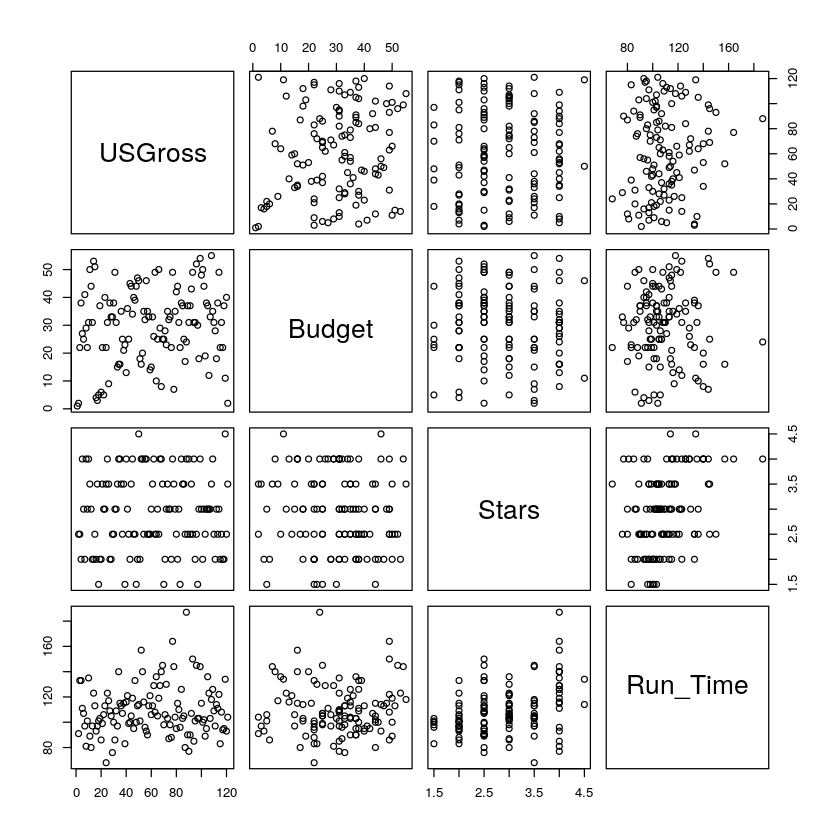

In [27]:
movmodel = movdat[c(2,3,4,7)]
indx <- sapply(movmodel, is.factor)
movmodel[indx] <- lapply(movmodel[indx], function(x) as.numeric(x))
                         
#make scatterplot matrix
plot(movmodel)

#make correlation 
cor(movmodel)

Q1:
Base on the plots and correlations, it suggests that gross profit does have some relationship with 3 predictors.

In [28]:
#Fit MLR model for USGross and other variables
lmresults = lm(USGross ~ Budget + Stars + Run_Time, data = movmodel)
summary(lmresults)


Call:
lm(formula = USGross ~ Budget + Stars + Run_Time, data = movmodel)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.434 -27.286  -0.981  27.885  70.738 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  34.1445    20.4458   1.670   0.0976 .
Budget        0.3401     0.2443   1.392   0.1666  
Stars        -1.0589     4.4237  -0.239   0.8112  
Run_Time      0.1841     0.1744   1.055   0.2935  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.75 on 116 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02721,	Adjusted R-squared:  0.002048 
F-statistic: 1.081 on 3 and 116 DF,  p-value: 0.3599


# Q2,3,4

Q2:
- predicted USgross = 34.1445 + 0.34Budget - 1.06Stars + 0.18Run_Time

- (millions $)                (million $) (no. of people) (million $)

Q3:
- For each 1 million dollars increase in Budget, the Gross profit will increase by 0.34 million dollars (higher budget allows better production, therefore creates better profit).
- For each additional Star performing in the movie, the Gross profit will decrease by 1.06 million dollars (as payment for their acting). 
- For each additional minute of Run Time in the movie, the Gross profit will increase by 0.18 million dollars (each minute added could help develop the characteristics and plot better).

Q4:
R^2 = 0.00205 = 0.205% 
Only 0.205 percent of all movie USgross profits are explained by the linear regression model. 

# Q5: model as a whole is a significant predictor of the response

Let assume significance level = 0.1 

- Null: None of the slopes is a significant predictor
B-budget = B-stars = B-run-time = 0
- Alternative: At least one slope is a significant predictor 
one of the B's != 0

- According to the fit model above, F-statistics = 1.081 on 113 df and p-value = 0.3599 > significance level

- Since p-value is highger than signidicance level, we do not reject H0 and conclude that the model as a whole 
#is not a significance predictor of US gross profit. 

# Q6: Budget as a significant predictor 
B-budget = 0 

- Null: Budget does not have any effect on the total US gross profit
B-budget = 0 when model includes all other variables
- Alternative: Budget does have an effect on the total US gross profit
B-budget != 0 when the model includes all variables


In [33]:
lmresults = lm(USGross ~ Stars + Run_Time, data = movmodel)
summary(lmresults)



Call:
lm(formula = USGross ~ Stars + Run_Time, data = movmodel)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.883 -26.989  -0.578  30.984  61.527 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  44.5423    19.1088   2.331   0.0215 *
Stars        -1.6432     4.4214  -0.372   0.7108  
Run_Time      0.1989     0.1748   1.138   0.2576  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.89 on 117 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01096,	Adjusted R-squared:  -0.005951 
F-statistic: 0.648 on 2 and 117 DF,  p-value: 0.525



According to the regression summary above, p-value = 0.525 > significance level of 0.1. 

Conclusion: Since p-value is high, we retain H0 and conclude that Budget is not a significant predictor of a movie's US gross profit.

# Q7 Confidence interval for slope of Budget 
CI = estimate +- t*(df) * SE 

from the fit regression ouput, we have 
estimate = 0.34, SE = 0.244, df = n - k -1 = 117 - 3 - 1 = 113
t*(df = 113, Ci = 90%) = 1.66

CI = 0.34 +- 1.66 * 0.244 = ( -0.065, 0.745)

Conclusion: We are 90% confident that, all else being equal, the model predicts that for every increase of 1 million dollars in budget, the US gross profit could increase by -0.0.65 to 0.745 million dollars.
